# Lab 2
# Parametric regression
# ---------------------------------------------------

<h2>Table of Contents</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ol>
    <li> Introduction </li>
    <li> Cross Validation </li>
    <li> Simple Linear Regression </li>
    <li> Multiple Linear Regression </li>
    <li> Non-Linear Regression </li>
    <li> Linear Regression with Regularization </li>
    <li> Comparison of the results obtained with the different models </li>
</ol>

</div>

<hr>


## 1. Introduction

Suppose you want to build a parametric regression model on a set of cases, where each case is described in terms of several variables. Without knowing anything else about the data set, give a reasoned justification:

a) Explain in your own words what is the main difference between supervised and unsupervised learning methods.  Give an example of the application of each type of method. Describe briefly the input and output variables you would consider in each example.

b) Explain in your own words the main difference between a linear and a non-linear model

c)  Explain the concept of overfitting and generalization. If you wish, you can support your answer with an outline or drawing. Explain in your own words how you could get the designed model to generalize well.


For the development of this second practice, the database "Pima Indian Diabetes" already pre-processed will be analyzed, where the rows of the file correspond to the cases and the columns to the variables.

For this practice, the data will be divided into two subsets: training and test. In addition, the validation scheme called k-fold cross validation will be considered.

#### Note that in this data et the goal is to predict, based on diagnostic measurements, whether a patient has diabetes. However, in this lab, we will deal with a regression task, this is, we will change the output

## 2. Cross-validatioin

For this practice, the validation scheme called k-fold cross validation will be considered. Remember that in this approach, the available cases are randomly divided into k subsets of the same size called "folds".

a) Indicate what a k-fold cross-validation scheme can be used for.

b) Justify reasonably which models will need to follow a cross-validation scheme.

c) As discussed in the theoretical classes, it is common in health to have a different number of cases in each class (unbalanced classes). Taking into account the database of this practice, please explain in detail the figure of merit you would consider in order to analyze the results with different parametric schemes.


In [1]:
from sklearn.model_selection import cross_val_score
from sklearn import model_selection   
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn import metrics
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

In [2]:
#Load data from csv and store it in dataframe
data = pd.read_csv("pima_indian_diabetes.csv") #We can change this database

# We show the first 
data.head() # Return the first n rows.

#Define the input and output data
#Glucose is the dependent variable in the lab
data_input = data.drop(['Glucose','Outcome'], axis=1) 
data_output = data['Glucose']

In [3]:
data_input.head()

,Pregnancies,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,72,35,0,33.6,0.627,50
1,1,66,29,0,26.6,0.351,31
2,8,64,0,0,23.3,0.672,32
3,1,66,23,94,28.1,0.167,21
4,0,40,35,168,43.1,2.288,33


In [4]:
data_output.head()

0    148
1     85
2    183
3     89
4    137
Name: Glucose, dtype: int64

In [5]:
#Define the Train (70% of the samples) and Test sets (30% of the samples)
# Random state to obtain always the same results
# For more details, check: https://numpy.org/doc/1.16/reference/generated/numpy.random.RandomState.html
X_train, X_test, Y_train, Y_test = train_test_split(data_input, data_output, test_size=0.3, random_state = 42)

In [6]:
X_train.head()

,Pregnancies,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
334,1,60,18,58,23.9,0.260,22
139,5,72,29,325,36.9,0.159,28
485,0,68,42,250,42.3,0.365,24
547,4,68,21,166,33.1,0.160,28
18,1,30,38,83,43.3,0.183,33


#### Define variables for R^2 and MSE

In [7]:
r2_results=[]
mse_results=[]


## 3. Simple Linear Regression

Linear regression allows us to establish the relationship between a dependent variable and one or more explanatory variables. This technique is used when the relationship between the variables is linear. 

Indicate:

a) What is the dependent variable that you could consider to address a linear regression problem?

b) Which variable is the one that allows better estimation of the dependent variable? You can be helped by the value of the correlation coefficient, as well as by some performance measures that you consider appropriate to evaluate the performance of the regressor.

c) Indicate whether the performance obtained in the test set change after normalizing the variables.



In [8]:
from sklearn import model_selection   
from sklearn import metrics
from sklearn.linear_model import LinearRegression

# Simple linear regression
regressor = LinearRegression()

#Train the model using the training set
regressor = regressor.fit(np.array(X_train['Age']).reshape(-1, 1), Y_train)

# Show the intercept
print(regressor.intercept_)

# Show the coeffients
print(regressor.coef_)

#Predict using the test set
y_pred = regressor.predict(np.array(X_test['Age']).reshape(-1,1))

# Compute the MSE
mse=metrics.mean_squared_error(Y_test, y_pred)
mse_results.append(mse)

# Compute the R2
r_squared=metrics.r2_score(Y_test, y_pred)
r2_results.append(r_squared)


print(f'R Squared: {r_squared} \n Mean Squared Error:{mse}')



96.3183850830471
[0.74168274]
R Squared: 0.06312833080687752 
 Mean Squared Error:906.4050891975435


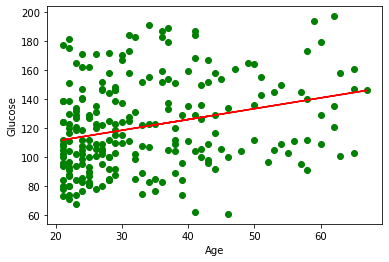

In [9]:
# Plot the samples and the predict
plt.scatter(X_test['Age'],Y_test,color='g')
plt.plot(X_test['Age'], y_pred,color='r')
plt.xlabel('Age')
plt.ylabel("Glucose")
plt.show()

In [10]:
# Normalize
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scalerfit =  scaler.fit(X_train)
X_train_norm=scaler.transform(X_train)
X_test_norm=scaler.transform(X_test)

# Simple linear regression
regressor = LinearRegression()

#Train the model using the training set
regressor = regressor.fit(X_train_norm[:,6].reshape(-1, 1), Y_train)

# Show the intercept
print(regressor.intercept_)

# Show the coeffients
print(regressor.coef_)

#Predict using the test set
y_pred_lsr = regressor.predict(X_test_norm[:,6].reshape(-1,1))

# Compute the MSE
mse_lsr=metrics.mean_squared_error(Y_test, y_pred_lsr)
mse_results.append(mse_lsr)


# Compute the R2
r_squared_lsr=metrics.r2_score(Y_test, y_pred_lsr)
r2_results.append(r_squared_lsr)

print(f'R Squared: {r_squared_lsr} \n Mean Squared Error:{mse_lsr}')


120.84916201117318
[8.65872605]
R Squared: 0.06312833080687752 
 Mean Squared Error:906.4050891975435


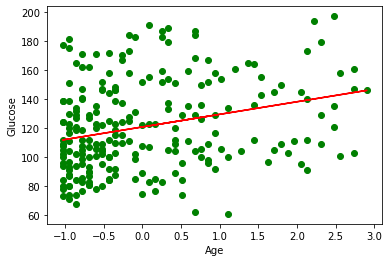

In [11]:
# Plot the samples and the predict
plt.scatter(X_test_norm[:,6],Y_test,color='g')
plt.plot(X_test_norm[:,6], y_pred,color='r')
plt.xlabel('Age')
plt.ylabel("Glucose")
plt.show()

## 4. Multiple Linear Regresion

In this section we will analyze:

a) How the value of the estimators, the correlation coefficient and the performance measures change when we change the number of explanatory variables.

b) The most relevant feautures. Explain in detail the process you have followed and justify which characteristics are most relevant to you in this database.

Note: you may have to repeat this section with a different number of variables in order to draw valid conclusions.

In [17]:
# Simple linear regression
regressor = LinearRegression()

#Train the model using the training set
regressor = regressor.fit(X_train_norm, Y_train)

# Show the intercept
print(regressor.intercept_)

# Show the coeffients
print(regressor.coef_)

#Predict using the test set
y_pred_mlr = regressor.predict(X_test_norm)

# Compute the MSE
mse_mlr=metrics.mean_squared_error(Y_test, y_pred_mlr)
mse_results.append(mse_mlr)

# Compute the R2
r_squared_mlr=metrics.r2_score(Y_test, y_pred_mlr)
r2_results.append(r_squared_mlr)

print(f'R Squared: {r_squared_mlr} \n Mean Squared Error:{mse_mlr}')


120.84916201117318
[ 0.37964402  2.32016285 -6.87037348 12.46775196  6.16769688  3.47336043
  7.03612178]
R Squared: 0.14997091162736054 
 Mean Squared Error:822.3865839923136


In [18]:
x_coef=np.arange(regressor.coef_.shape[0])
print(x_coef)

[0 1 2 3 4 5 6]


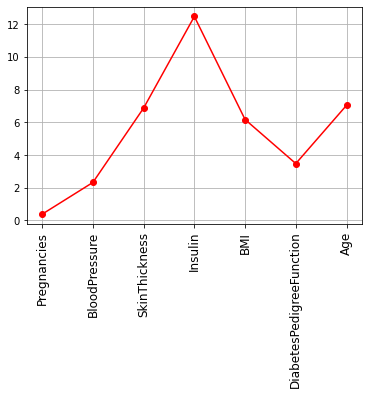

In [19]:
import matplotlib.pyplot as plt  
plt.plot( x_coef, abs(regressor.coef_) ,color='r', marker="o")
plt.xticks(np.arange(regressor.coef_.shape[0]), data_input.columns, rotation=90,  fontsize=12)  # Set text labels and properties.
plt.grid()

You can explore results when: (1) normalizing data; (2) discarding some features based on their coefficients; (3) using other approaches such stats

In [20]:
import statsmodels.api as sm
mod = sm.OLS(Y_train, X_train_norm)
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                Glucose   R-squared (uncentered):                   0.017
Model:                            OLS   Adj. R-squared (uncentered):              0.004
Method:                 Least Squares   F-statistic:                              1.316
Date:                Tue, 05 Oct 2021   Prob (F-statistic):                       0.240
Time:                        09:09:38   Log-Likelihood:                         -3350.6
No. Observations:                 537   AIC:                                      6715.
Df Residuals:                     530   BIC:                                      6745.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## 5. Non-linear regression


Many of the relationships between variables we study are non-linear. As we have seen in theory, we can highlight the functions logarithmic, inverse, quadratic, cubic, power, exponential, etc.

a) Include which non-linear functions best fit the available data.

b) Indicate whether the performance obtained in the test set changes after normalizing the variables.


In [21]:
# Non-linear regression with a defined degree
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4) # We can change the degree
X_train_poly = poly_reg.fit_transform(X_train)
X_test_poly = poly_reg.transform(X_test)
pol_reg = LinearRegression()
pol_reg.fit(X_train_poly, Y_train)
print(X_train.shape)
print(X_train_poly.shape)
print(Y_train.shape)
print(X_test_poly.shape)


(537, 7)
(537, 330)
(537,)
(231, 330)


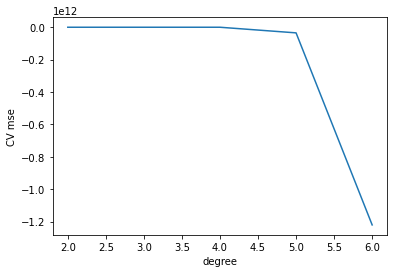

2


In [22]:
# Use cross validation for finding the degree
cv_degree_scores=[]
d_values = range(2,7,1)
for d in d_values:
    poly_reg = PolynomialFeatures(degree=d)
    X_train_poly = poly_reg.fit_transform(X_train)
    X_test_poly = poly_reg.transform(X_test)
    pol_reg = LinearRegression()
    scores= cross_val_score(pol_reg, X_train_poly, Y_train, cv=3, scoring='neg_mean_squared_error')
    cv_degree_scores.append(scores.mean())
    
plt.plot(d_values, cv_degree_scores)
plt.xlabel('degree')
plt.ylabel('CV mse')
plt.show()

# Select the maximum because we are considering accuracuy
print(np.array(d_values)[cv_degree_scores.index(np.array(cv_degree_scores).max())])

In [23]:
# Train and predict with the best degree
poly_reg = PolynomialFeatures(degree=np.array(d_values)[cv_degree_scores.index(np.array(cv_degree_scores).max())])
X_train_poly = poly_reg.fit_transform(X_train_norm)
X_test_poly = poly_reg.transform(X_test_norm)

# Train
pol_reg = LinearRegression()
pol_reg.fit(X_train_poly, Y_train)
y_pred_pol=pol_reg.predict(X_test_poly)

# Compute the MSE
mse_pol=metrics.mean_squared_error(Y_test, y_pred_pol)
mse_results.append(mse_pol)

# Compute the R2
r_squared_pol=metrics.r2_score(Y_test, y_pred_pol)
r2_results.append(r_squared_pol)

# Print results
print(f'R Squared: {r_squared_pol} \n Mean Squared Error:{mse_pol}')

R Squared: 0.11542532325012467 
 Mean Squared Error:855.808767781282


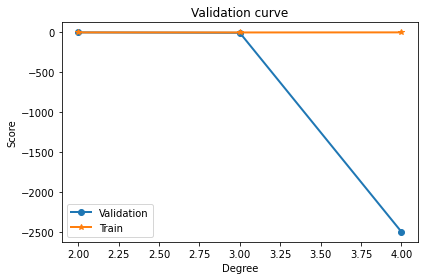

In [24]:
from sklearn.model_selection import validation_curve
from sklearn.pipeline import make_pipeline

degrees = np.arange(2, 5)

model = make_pipeline(PolynomialFeatures(), LinearRegression())

# The parameter to vary is the "degrees" on the pipeline step
# "polynomialfeatures"
train_scores, validation_scores = validation_curve(
                 model, X_train, Y_train,
                 param_name='polynomialfeatures__degree',
                 param_range=degrees)

# Plot the mean train error and validation error across folds
plt.figure(figsize=(6, 4))
plt.plot(degrees, validation_scores.mean(axis=1), lw=2,
         label='Validation', marker='o')
plt.plot(degrees, train_scores.mean(axis=1), lw=2, label='Train',marker='*')

plt.legend(loc='best')
plt.xlabel('Degree')
plt.ylabel('Score')
plt.title('Validation curve')
plt.tight_layout()

## 6. Linear regression with regularization

a) Indicate whether the performance obtained in the test set changes when changing the regularization considered.

b) Justify which characteristics are more relevant for these models

In [25]:
# Ridge Regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
ridge = Ridge()

# Values for alpha
parameters = {"alpha":[1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20,30]}

# Grid search for ridge regression
ridge_regression = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)

# Train 
ridge_regression.fit(X_train_norm, Y_train)

# Best parameters and best score
print(ridge_regression.best_params_)
print(ridge_regression.best_score_)


# Predict
y_pred_ridge = ridge_regression.predict(X_test_norm)

# Compute the MSE
mse_ridge=metrics.mean_squared_error(Y_test, y_pred_ridge)
mse_results.append(mse_ridge)


# Compute the R2
r_squared_ridge=metrics.r2_score(Y_test, y_pred_ridge)
r2_results.append(r_squared_ridge)

print(f'R Squared: {r_squared_ridge} \n Mean Squared Error:{mse_ridge}')


{'alpha': 10}
-798.3180502127368
R Squared: 0.15358461312644378 
 Mean Squared Error:818.890398188733


In [32]:
from sklearn.linear_model import Lasso

lasso = Lasso()

# Values for alpha
parameters = {"alpha":[1e-4, 1e-2, 1, 5, 10, 20]}

# Grid search for lasso regression
lasso_regression = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)

# Train 
lasso_train=lasso_regression.fit(X_train_norm, Y_train)

print(lasso_regression.best_params_)
print(lasso_regression.best_score_)

# Predict
y_pred_lasso = lasso_regression.predict(X_test_norm)

# Compute the MSE
mse_lasso=metrics.mean_squared_error(Y_test, y_pred_lasso)
mse_results.append(mse_lasso)


# Compute the R2
r_squared_lasso=metrics.r2_score(Y_test, y_pred_lasso)
r2_results.append(r_squared_lasso)

#Print results
print(f'R Squared: {r_squared_lasso} \n Mean Squared Error:{mse_lasso}')
 
# Calculate Mean Squared Error
mean_squared_error = np.mean((y_pred_lasso - Y_test)**2)
print("Mean squared error on test set", mean_squared_error)

 

{'alpha': 0.0001}
-798.7150454916369
R Squared: 0.1499744578356884 
 Mean Squared Error:822.3831531048384
Mean squared error on test set 822.3831531048388


## 6. Comparison of the results obtained with the different models


Provide in a table the performance measures  obtained both in the validation and test set  by the different models designed.

In view of the results obtained, please answer, if possible, the following questions:

a) Justify whether the fact of normalizing the feature's values influence the results obtained.

b) Reasonably justify whether you would use a linear or non-linear parametric scheme. Indicate and justify the scheme that provides the best performance in the set of tests.

c) Indicate and justifiy which are the most relevant feautures as well as the procedure to identify them.

d) Indicate and justify  whether the fact of making a single partition of the cases in the training and test sets can influence the results obtained. Starting from the original data, make a new partition of the cases in the training and test sets. Select one of the analyzed models (indicate the chosen models) and obtain again the figures of merti. Comment the obtained results. 

In [33]:
results = pd.DataFrame()

results["R2 in the test set"] = r2_results
results["MSE in the test set"] = mse_results

#results
results["Models"] = ["Linear Regression (LR) ", "LR Normalized", "Multiple LR Normalized", "Non-LR Normalized", "Rigde", "Lasso"]
results.set_index("Models", inplace = True)


In [35]:
results

,R2 in the test set,MSE in the test set
Models,,
Linear Regression (LR),0.063128,906.405089
LR Normalized,0.063128,906.405089
Multiple LR Normalized,0.149971,822.386584
Non-LR Normalized,0.115425,855.808768
Rigde,0.153585,818.890398
Lasso,0.149974,822.383153
